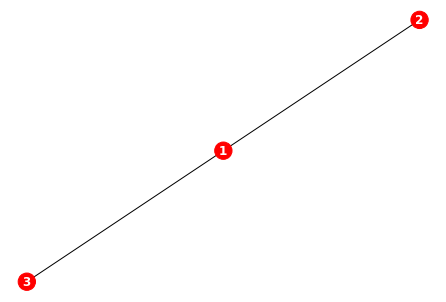

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

## create graph

nodes = [1,2,3]
edges = {'1': [2,3], '2':[1], '3':[1]}
colors = ['r']*len(nodes)

#######

e = []
for i in edges:
  for j in edges[i]:
    if int(i)<j:
      e.append((int(i) ,j))

G=nx.Graph() 
G.add_nodes_from(nodes)
G.add_edges_from(e)

nx.draw(G, with_labels=True,node_color=colors, font_weight='bold',font_color='white')
plt.show(); 

In [ ]:
import math
  
def powerset(fullset):
  listrep = list(fullset)
  subsets = []
  for i in range(2**len(listrep)):
    subset = []
    for k in range(len(listrep)):            
      if i & 1<<k:
        subset.append(listrep[k])
    subsets.append(subset)        
  return subsets

a = list(powerset(nodes))[1:-1]
b = list(reversed(list(powerset(nodes))[1:-1]))
all_p = list(zip(a,b))

In [ ]:
best_value = 0
best_cut = 0

for p in all_p: 
  value1 = 0
  checklist1 = []
  for i in p[0]:
    for j in edges[str(i)]:
      if j in p[0]:
        checklist1.append(j)
    if i in checklist1:
      continue
    value1 += 1

  value2 = 0
  checklist2 = []
  for i in p[1]: 
    for j in edges[str(i)]:
      if j in p[1]:
        checklist2.append(j)
    if i in checklist2:
      continue
    value2 += 1
  
  if sum([value1, value2])> best_value:
    best_value = sum([value1, value2])
    best_cut = p
  #print('Cut : ',p, '  -  Value : ',sum([value1, value2]))
print('Cut : ',best_cut, '  -  Value : ', best_value)

Cut :  ([1], [2, 3])   -  Value :  3


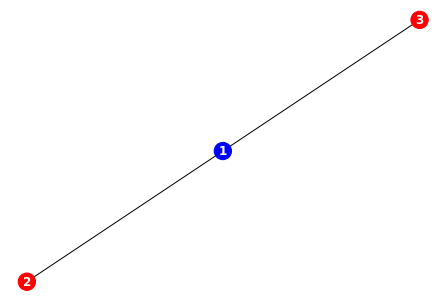

In [ ]:
color = colors.copy()
for c in best_cut[0]:
  color[c-1] = 'b'

G=nx.Graph() 
G.add_nodes_from(nodes)
G.add_edges_from(e)

nx.draw(G, with_labels=True,node_color=color, font_weight='bold',font_color='white')
plt.show(); 

In [ ]:
!pip install qiskit
!pip install pylatexenc

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.circuit.library import AND
# import basic plot tools
from qiskit.visualization import  plot_histogram

In [ ]:
def phase_oracle(circuit, edges, n, e):
    for id, edge1 in enumerate(edges):
        m = list(map( lambda x: x-1, edge1))
        circuit.cx(m, [id + n, id + n])
        
   

    circuit.ccx(n + e -2, n + e -1,n + e)


    for id, edge2 in enumerate(reversed(edges)):
        edge2 = list(reversed(edge2))
        m = list(map( lambda x: x-1, edge2))
        circuit.cx(m, [len(edges) - id + n -1 , len(edges) - id + n -1])


def diffuser(circuit, n):
    """Apply inversion about the average step of Grover's algorithm."""

    for q in range(n):
        circuit.h(q)
        circuit.x(q)
    
    # Do controlled-Z
    circuit.h(n-1)
    circuit.mcx(list(range(0,n-1)),n-1)
    circuit.h(n-1)
    
    for q in range(n):
        circuit.x(q)
        circuit.h(q)

In [ ]:
n = 3
es = 2
barriers = True
edges = e
grover_circuit = QuantumCircuit(n+es+1, n)

for qubit in range(n):
    grover_circuit.h(qubit)

#kickback
grover_circuit.x(n+es)
grover_circuit.h(n+es)

for _ in range(1):     #int(((2**n)**0.5))
    if barriers:
        grover_circuit.barrier()
    
    phase_oracle(grover_circuit, edges, n,es)

    if barriers:
        grover_circuit.barrier()

    diffuser(grover_circuit,n)

grover_circuit.measure(range(n),range(n))

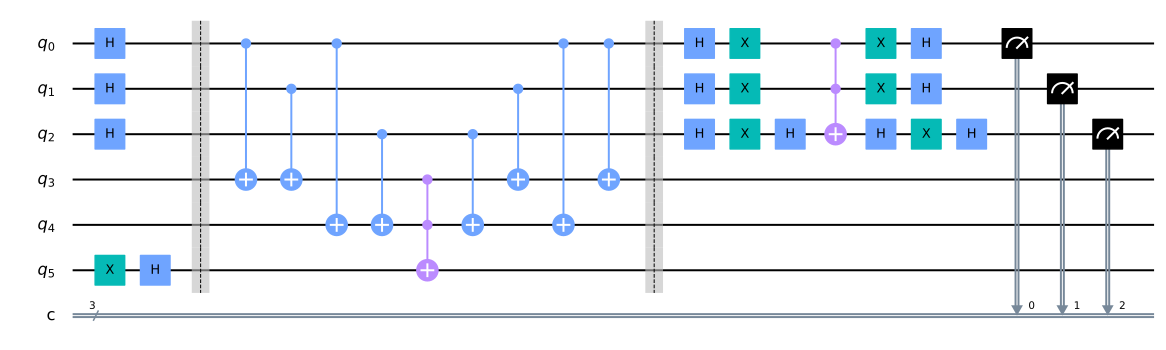

In [ ]:
grover_circuit.draw(output="mpl")

{'001': 1047, '110': 1001}


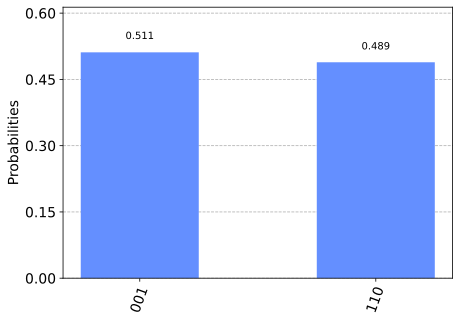

In [ ]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(grover_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
print(answer)
plot_histogram(answer)


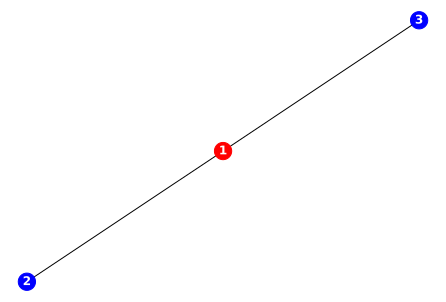

In [ ]:
best_p = 0
a = '000'
for c in answer:
  
  if best_p < answer[c]:
    best_p = answer[c]
    a = c
color = colors.copy()
for id, c in enumerate(a):
  #c = c[::-1]
  if c == '1':
    color[id] = 'r'
  else:
    color[id] = 'b'
color = list(reversed(color))
G=nx.Graph() 
G.add_nodes_from(nodes)
G.add_edges_from(e)

nx.draw(G, with_labels=True,node_color=color, font_weight='bold',font_color='white')
plt.show(); 